# Planteamiento del proyecto

Después de lanzar tu modelo de clasificación, se ha observado que los resultados no son los esperados. Al poner el modelo en producción, los pacientes no están siendo correctamente clasificados. Tu equipo y tú sospecháis que posiblemente las etiquetas de los datos de entrenamiento no son las correctas, o que hay otra forma de agrupar a los pacientes.

El dataset a utilizar es el que aparece en la carpeta: [Cardiovascular Disease Dataset](./Cardiovascular_Disease_Dataset.csv)

Objetivos a cumplir:
1. Seleccionar un algoritmo para poder visualizar los clústeres de pacientes.
2. Evaluar estos clusters para determinar si la etiquetación es correcta.
2. Investigar si hay otros clústeres que debas tener en cuenta y decidir si es necesario retiquetar los datos o no.

In [1]:
# Importación de algunas librerías
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

rn_state = 42

Variables del dataset:
- ***patientid:*** Numero identificativo del paciente(único).
- ***age:*** Edad.
- ***gender:*** Género, 0 (female), 1 (male).
- ***chestpain:*** Tipo de dolor en el pecho,  0 (angina típica), 1 (angina atípica), 2 (dolor no anginoso), 3 (asintomático).
- ***restingBP:*** Presión arterial en reposo, 94-200 (in mm HG).
- ***serumcholestrol:*** Colesterol sérico, 126-564 (in mg/dl).
- ***fastingbloodsugar:*** Glucemia en ayunas, 0 (false), 1 (true) > 120 mg/dl.
- ***restingrelectro:***  Resultados del electrocardiograma en reposo, 0 (normal), 1 (ST-T wave abnormality), 2 (probable or definite left ventricular hypertrophy).
- ***maxheartrate:*** Frecuencia cardíaca máxima alcanzada, 71-202.
- ***exerciseangia:*** Angina inducida por el ejercicio, 0 (no), 1 (yes).
- ***oldpeak:*** Viejo pico = ST, 0-6.2.
- ***slope:*** Pendiente del segmento ST del ejercicio máximo, 1 (pendiente ascendente), 2 (plana), 3 (pendiente descendente).
- ***noofmajorvessels:*** Número de vasos mayores (0, 1, 2, 3).
- ***target*** Clasificación resultado 0 (Ausencia de enfermedad cardíaca), 1 (Presencia de enfermedad cardíaca).

## 1. Primer contacto con los datos

En este apartado cargaremos los datos y realizaremos una exploración de los mismos.

### 1.1. Carga de los datos

Cargaremos los datos en un dataframe de pandas.


In [2]:
df_cardiovascular = pd.read_csv('Cardiovascular_Disease_Dataset.csv')
df_cardiovascular.head()

patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0     103368   53       1          2        171                0   
1     119250   40       1          0         94              229   
2     119372   49       1          2        133              142   
3     132514   43       1          0        138              295   
4     146211   31       1          1        199                0   

   fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                  0                1           147              0      5.3   
1                  0                1           115              0      3.7   
2                  0                0           202              1      5.0   
3                  1                1           153              0      3.2   
4                  0                2           136              0      5.3   

   slope  noofmajorvessels  target  
0      3                 3       1  
1      1                 1       0  
2      1                 0       0  
3      2                 2       1  
4      3                 2       1

### 1.2. Limpieza de los datos

En este apartado realizaremos una limpieza de los datos.
- Obtenemos información del dataset.
- Sacamos los parámetros estadísticos más relevantes de las variables
- Identificamos y eliminamos los valores nulos y duplicados.
- Realizamos una transformación de variables para que sean más fáciles de analizar, si es necesario.
- Eliminamos las variables que no aportan ninguna información relevante.


In [3]:
# Mostramos información de los datos
df_cardiovascular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [4]:
# Hacemos un resumen de las métricas estadísticas más relevantes de los datos
df_cardiovascular.describe()

patientid         age       gender    chestpain    restingBP  \
count  1.000000e+03  1000.00000  1000.000000  1000.000000  1000.000000   
mean   5.048704e+06    49.24200     0.765000     0.980000   151.747000   
std    2.895905e+06    17.86473     0.424211     0.953157    29.965228   
min    1.033680e+05    20.00000     0.000000     0.000000    94.000000   
25%    2.536440e+06    34.00000     1.000000     0.000000   129.000000   
50%    4.952508e+06    49.00000     1.000000     1.000000   147.000000   
75%    7.681877e+06    64.25000     1.000000     2.000000   181.000000   
max    9.990855e+06    80.00000     1.000000     3.000000   200.000000   

       serumcholestrol  fastingbloodsugar  restingrelectro  maxheartrate  \
count      1000.000000        1000.000000      1000.000000   1000.000000   
mean        311.447000           0.296000         0.748000    145.477000   
std         132.443801           0.456719         0.770123     34.190268   
min           0.000000           0.000000         0.000000     71.000000   
25%         235.750000           0.000000         0.000000    119.750000   
50%         318.000000           0.000000         1.000000    146.000000   
75%         404.250000           1.000000         1.000000    175.000000   
max         602.000000           1.000000         2.000000    202.000000   

       exerciseangia      oldpeak        slope  noofmajorvessels       target  
count    1000.000000  1000.000000  1000.000000       1000.000000  1000.000000  
mean        0.498000     2.707700     1.540000          1.222000     0.580000  
std         0.500246     1.720753     1.003697          0.977585     0.493805  
min         0.000000     0.000000     0.000000          0.000000     0.000000  
25%         0.000000     1.300000     1.000000          0.000000     0.000000  
50%         0.000000     2.400000     2.000000          1.000000     1.000000  
75%         1.000000     4.100000     2.000000          2.000000     1.000000  
max         1.000000     6.200000     3.000000          3.000000     1.000000

In [5]:
# Vemos la cantidad de valores NaN que hay
df_cardiovascular.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [6]:
# Vemos la cantidad de valores duplicados que hay
df_cardiovascular.duplicated().sum()

0

No tenemos ni valores perdidos(NaN) ni duplicados. Sólo tenemos que eliminar la variable **patientid**, que no aporta ninguna información relevante, antes de hacer un análisis más exaustivo.

In [7]:
df_cardiovascular_clean = df_cardiovascular.drop(columns='patientid')
df_cardiovascular_clean.head()

age  gender  chestpain  restingBP  serumcholestrol  fastingbloodsugar  \
0   53       1          2        171                0                  0   
1   40       1          0         94              229                  0   
2   49       1          2        133              142                  0   
3   43       1          0        138              295                  1   
4   31       1          1        199                0                  0   

   restingrelectro  maxheartrate  exerciseangia  oldpeak  slope  \
0                1           147              0      5.3      3   
1                1           115              0      3.7      1   
2                0           202              1      5.0      1   
3                1           153              0      3.2      2   
4                2           136              0      5.3      3   

   noofmajorvessels  target  
0                 3       1  
1                 1       0  
2                 0       0  
3                 2       1  
4                 2       1

### 1.3. EDA 

En esta etapa vamos a realizar un análisis más exaustivo de las variables.
- Veremos la distribución de las variables numéricas.
- Distribución de la variable Objetivo.
- Distribución por género.
- Boxplots para detectar Outliers.
- Matriz de Correlación.
- Pairplot para Visualizar Relaciones.
- Distribución de Variables Categóricas Respecto a la Variable Objetivo.

#### 1.3.1. Distribución de las variables numéricas

En este apartado vamos a ver la distribución de las variables numéricas.



<Figure size 2000x1500 with 0 Axes>

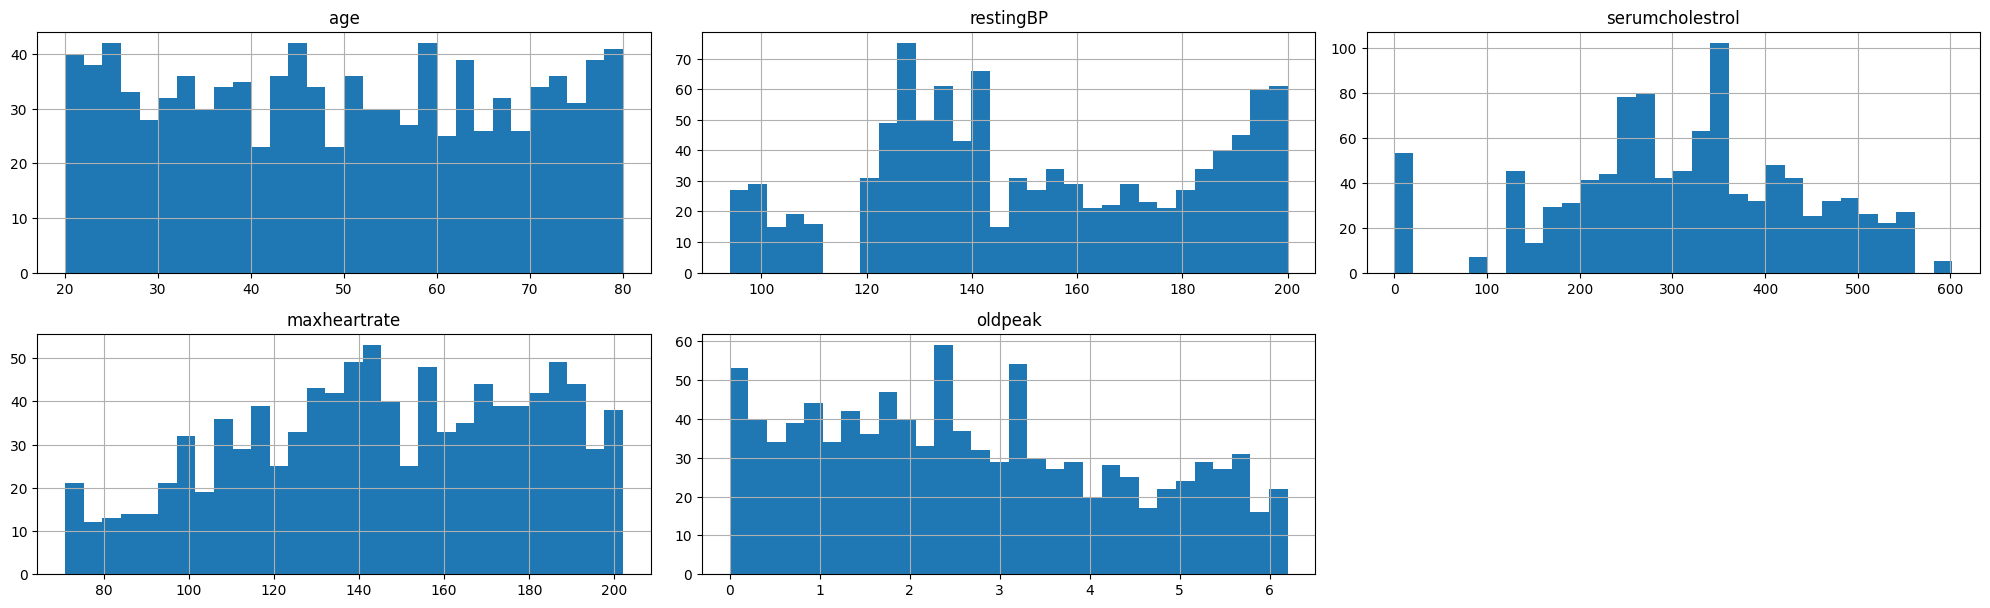

In [8]:
# Definir un umbral para el número máximo de valores únicos que puede tener una columna categórica
threshold = 10

# Identificar columnas numéricas basadas en el umbral de valores únicos
numerical_columns = [col for col in df_cardiovascular_clean.columns if df_cardiovascular_clean[col].nunique() > threshold]

# Distribución de las variables numéricas
plt.figure(figsize=(20, 15))
df_cardiovascular_clean[numerical_columns].hist(bins=30, figsize=(20, 15), layout=(5, 3))
plt.tight_layout()
plt.show()

#### 1.3.2. Distribución de la variable Objetivo.

La distribución de la variable objetivo es la distribución de la variable que se desea optimizar.

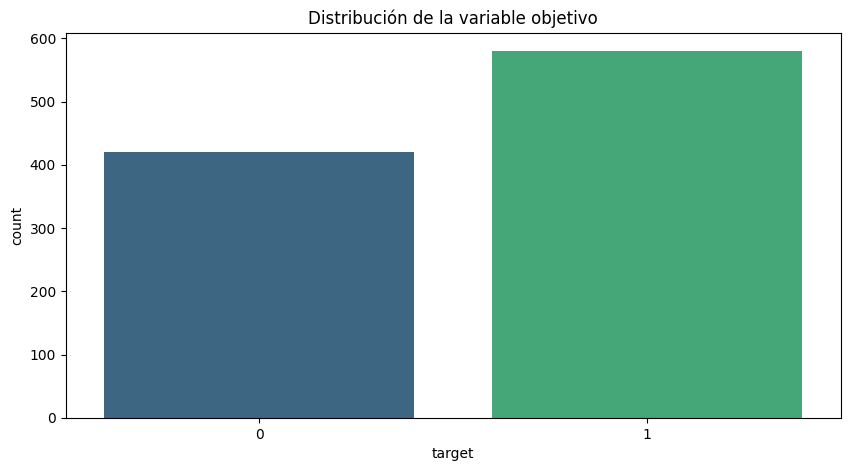

In [9]:
# Distribución de la variable objetivo
plt.figure(figsize=(10, 5))
sns.countplot(data=df_cardiovascular_clean, x='target', hue='target', palette='viridis', legend=False)
plt.title('Distribución de la variable objetivo')
plt.show()

#### 1.3.3. Distribución por género.


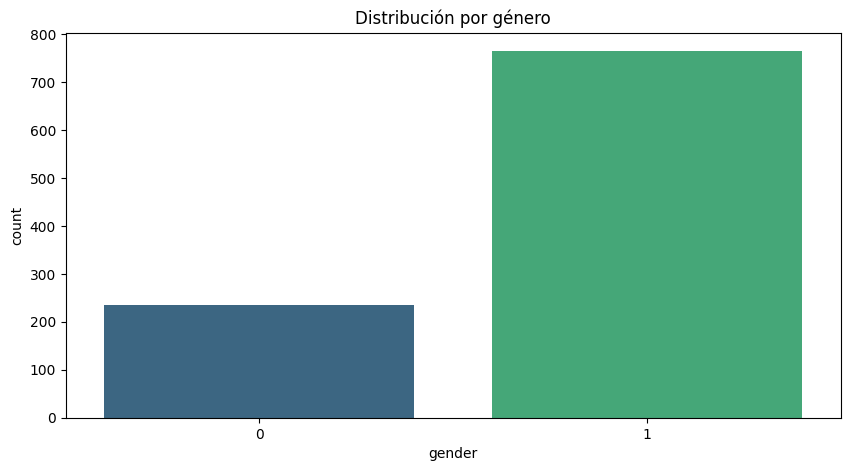

In [10]:
# Distribución por género
plt.figure(figsize=(10, 5))
sns.countplot(data=df_cardiovascular_clean, x='gender', hue='gender', palette='viridis', legend=False)
plt.title('Distribución por género')
plt.show()

#### 1.3.4. Boxplots pada detectar valores atípicos.

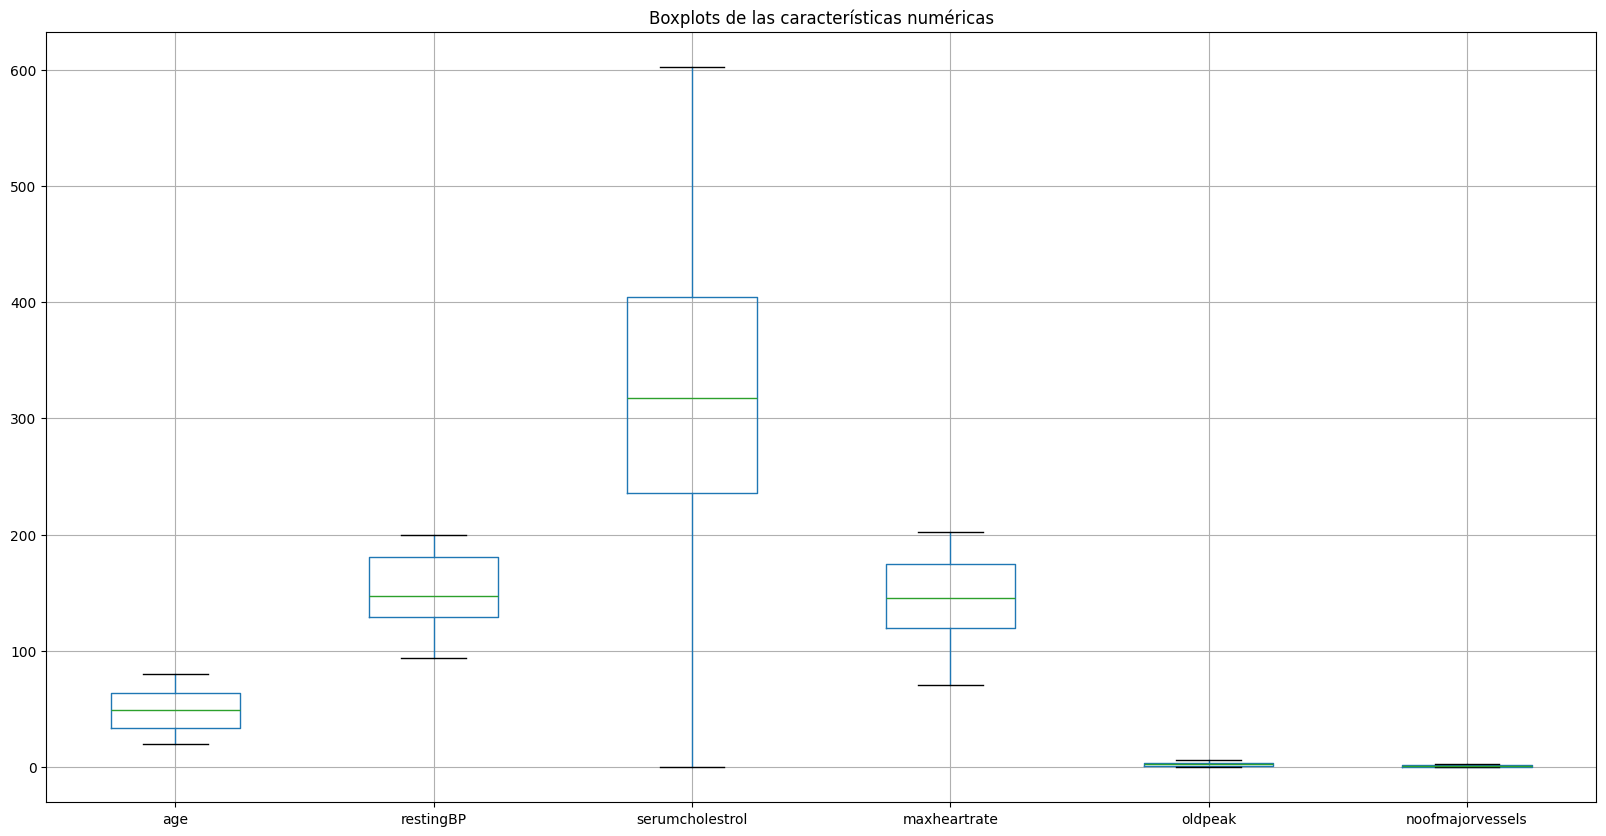

In [11]:
# Boxplots para detectar valores atípicos
features_to_normalize = [
    'age', 'restingBP', 'serumcholestrol', 'maxheartrate', 
    'oldpeak', 'noofmajorvessels'
]

plt.figure(figsize=(20, 10))
df_cardiovascular_clean[features_to_normalize].boxplot()
plt.title('Boxplots de las características numéricas')
plt.show()

No tenemos valores atípicos por lo que se puede apreciar.

#### 1.3.5. Matriz de Correlación.

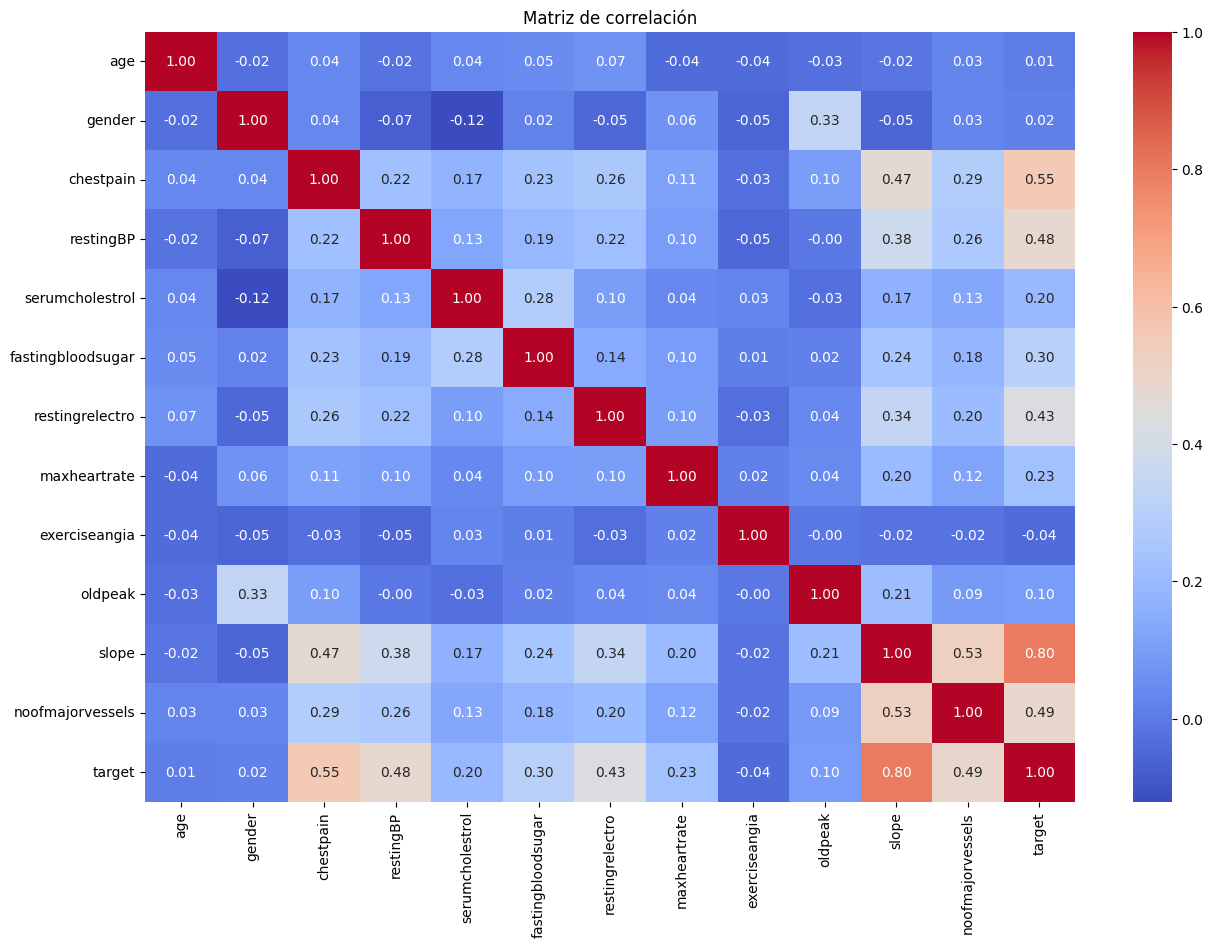

In [12]:
# Matriz de correlación
plt.figure(figsize=(15, 10))
corr_matrix = df_cardiovascular_clean.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

#### 1.3.6. Pairplot para visualizar relaciones entre las variables.

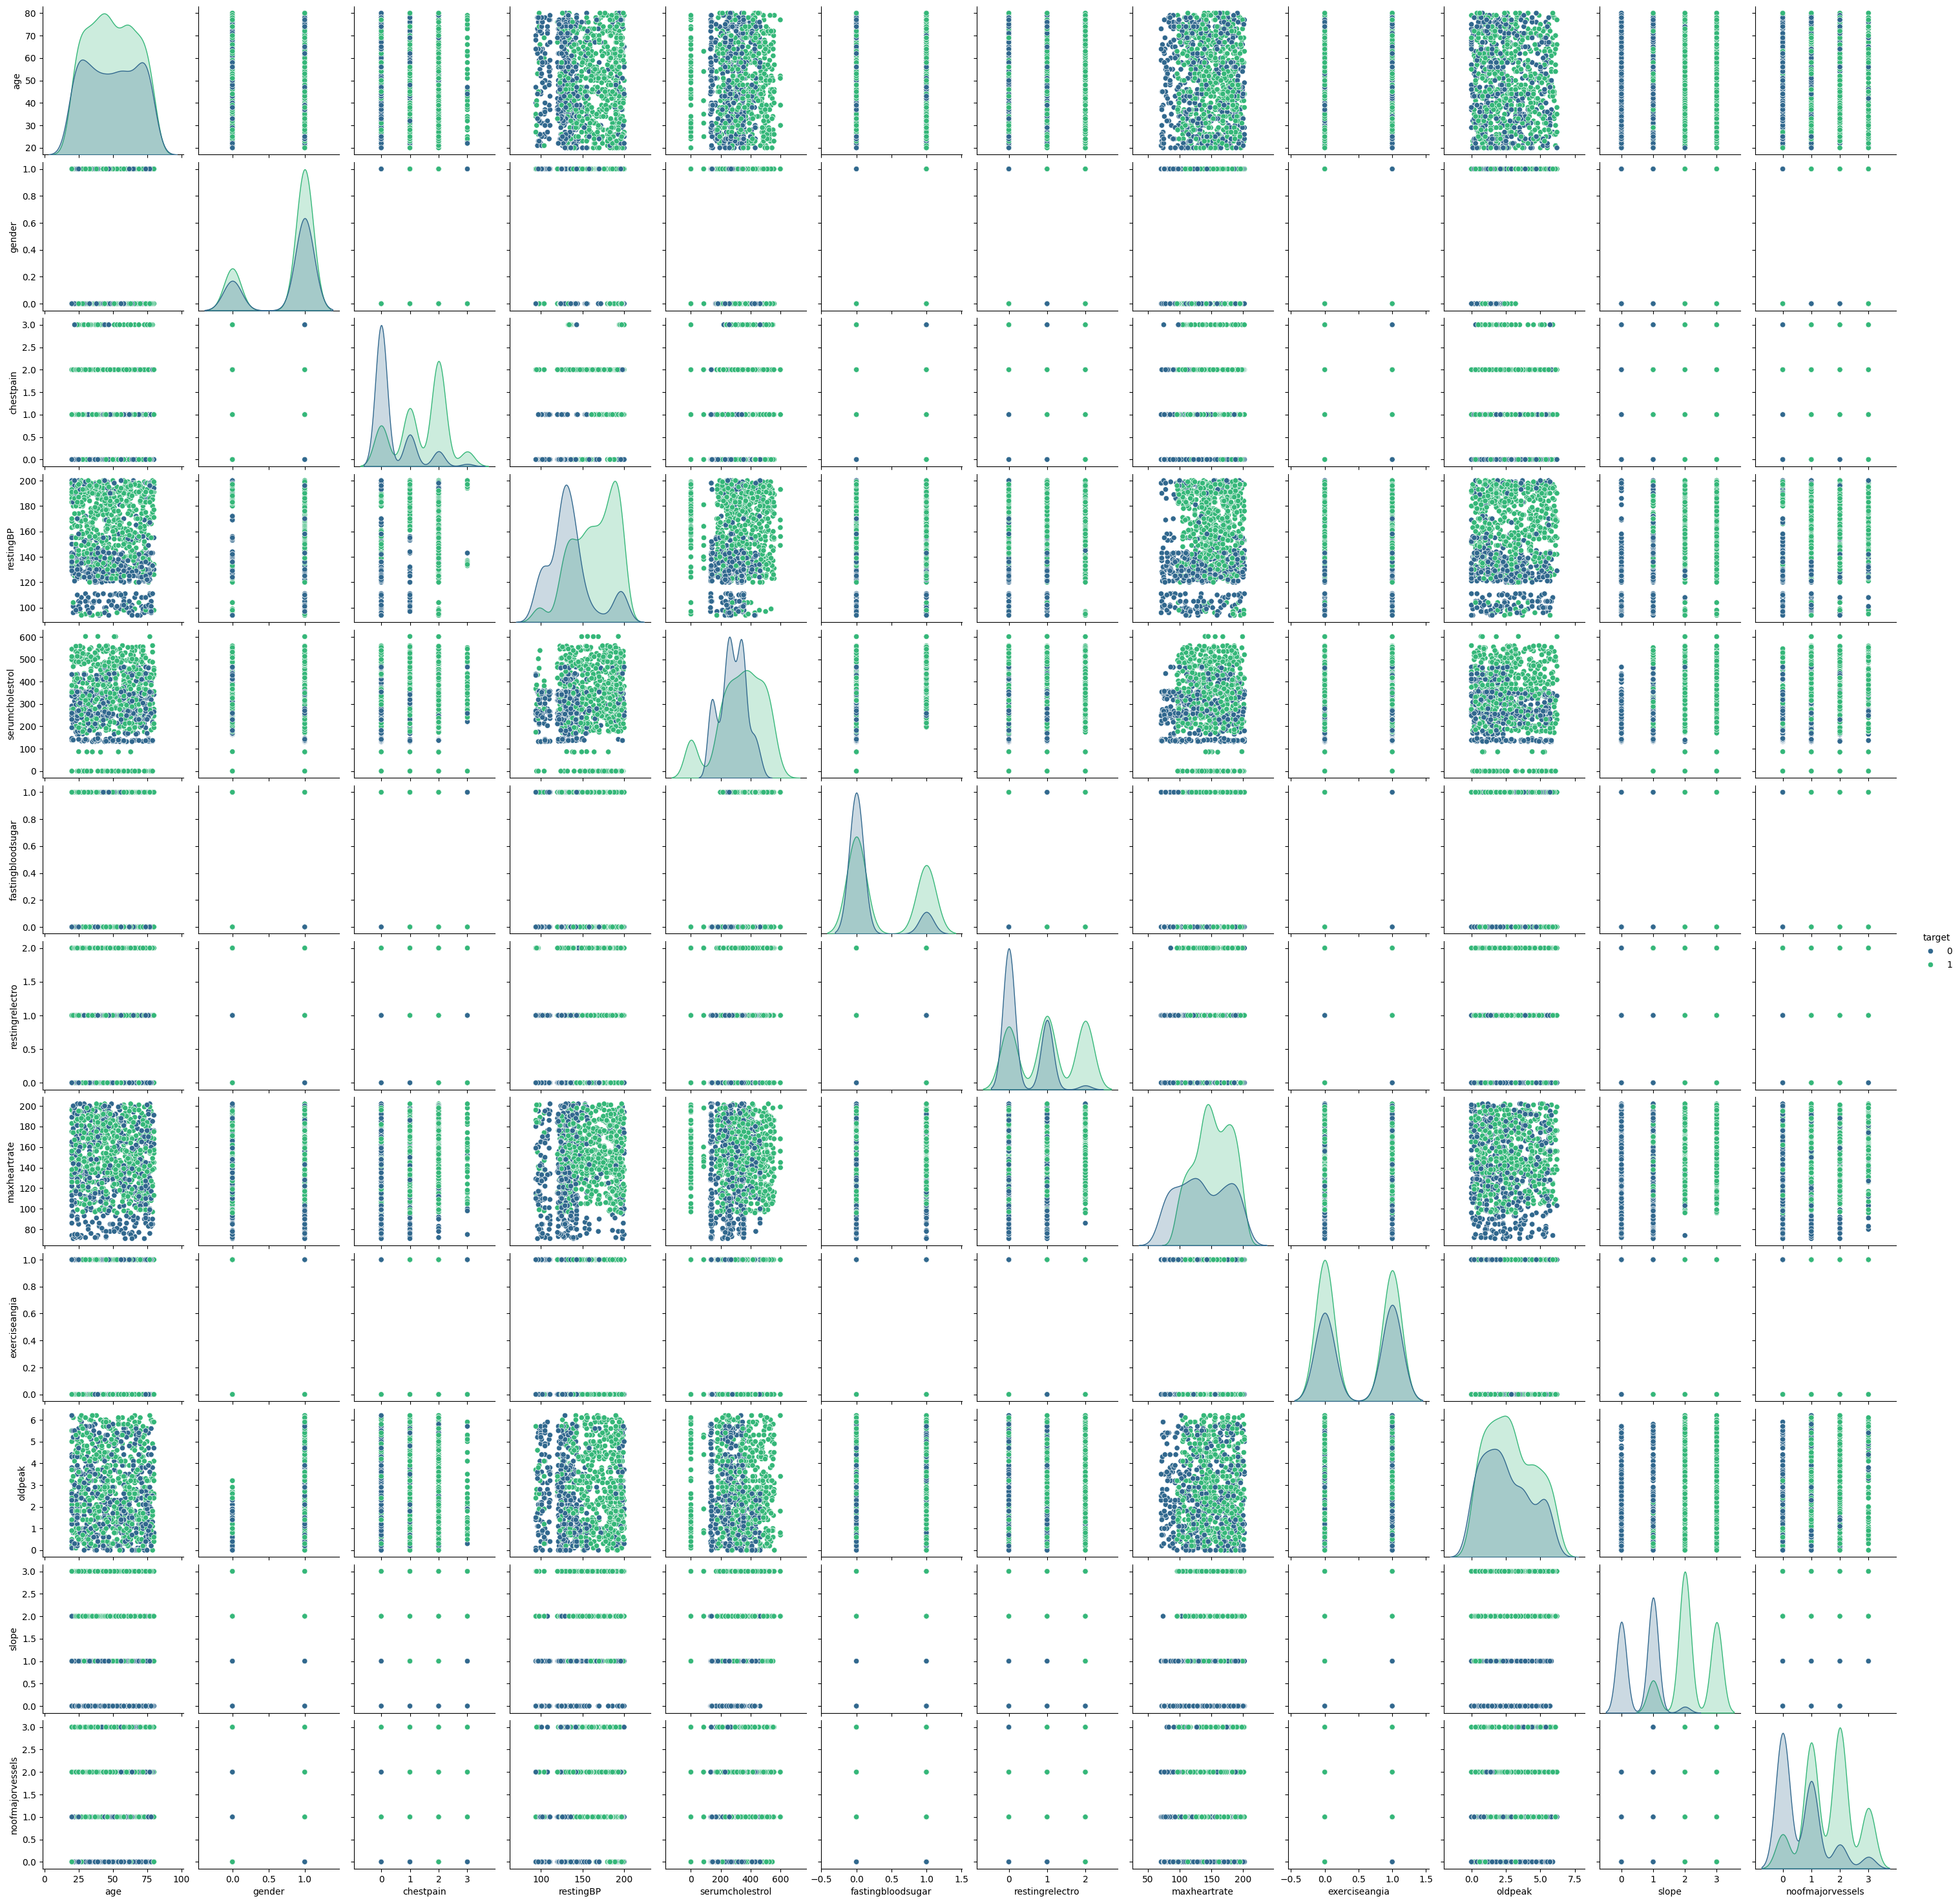

In [13]:
# Pairplot para visualizar relaciones entre las variables
sns.pairplot(df_cardiovascular_clean, hue='target', palette='viridis')
plt.show()

#### 1.3.7. Distribución de variables categóricas respecto a la variable objetivo.

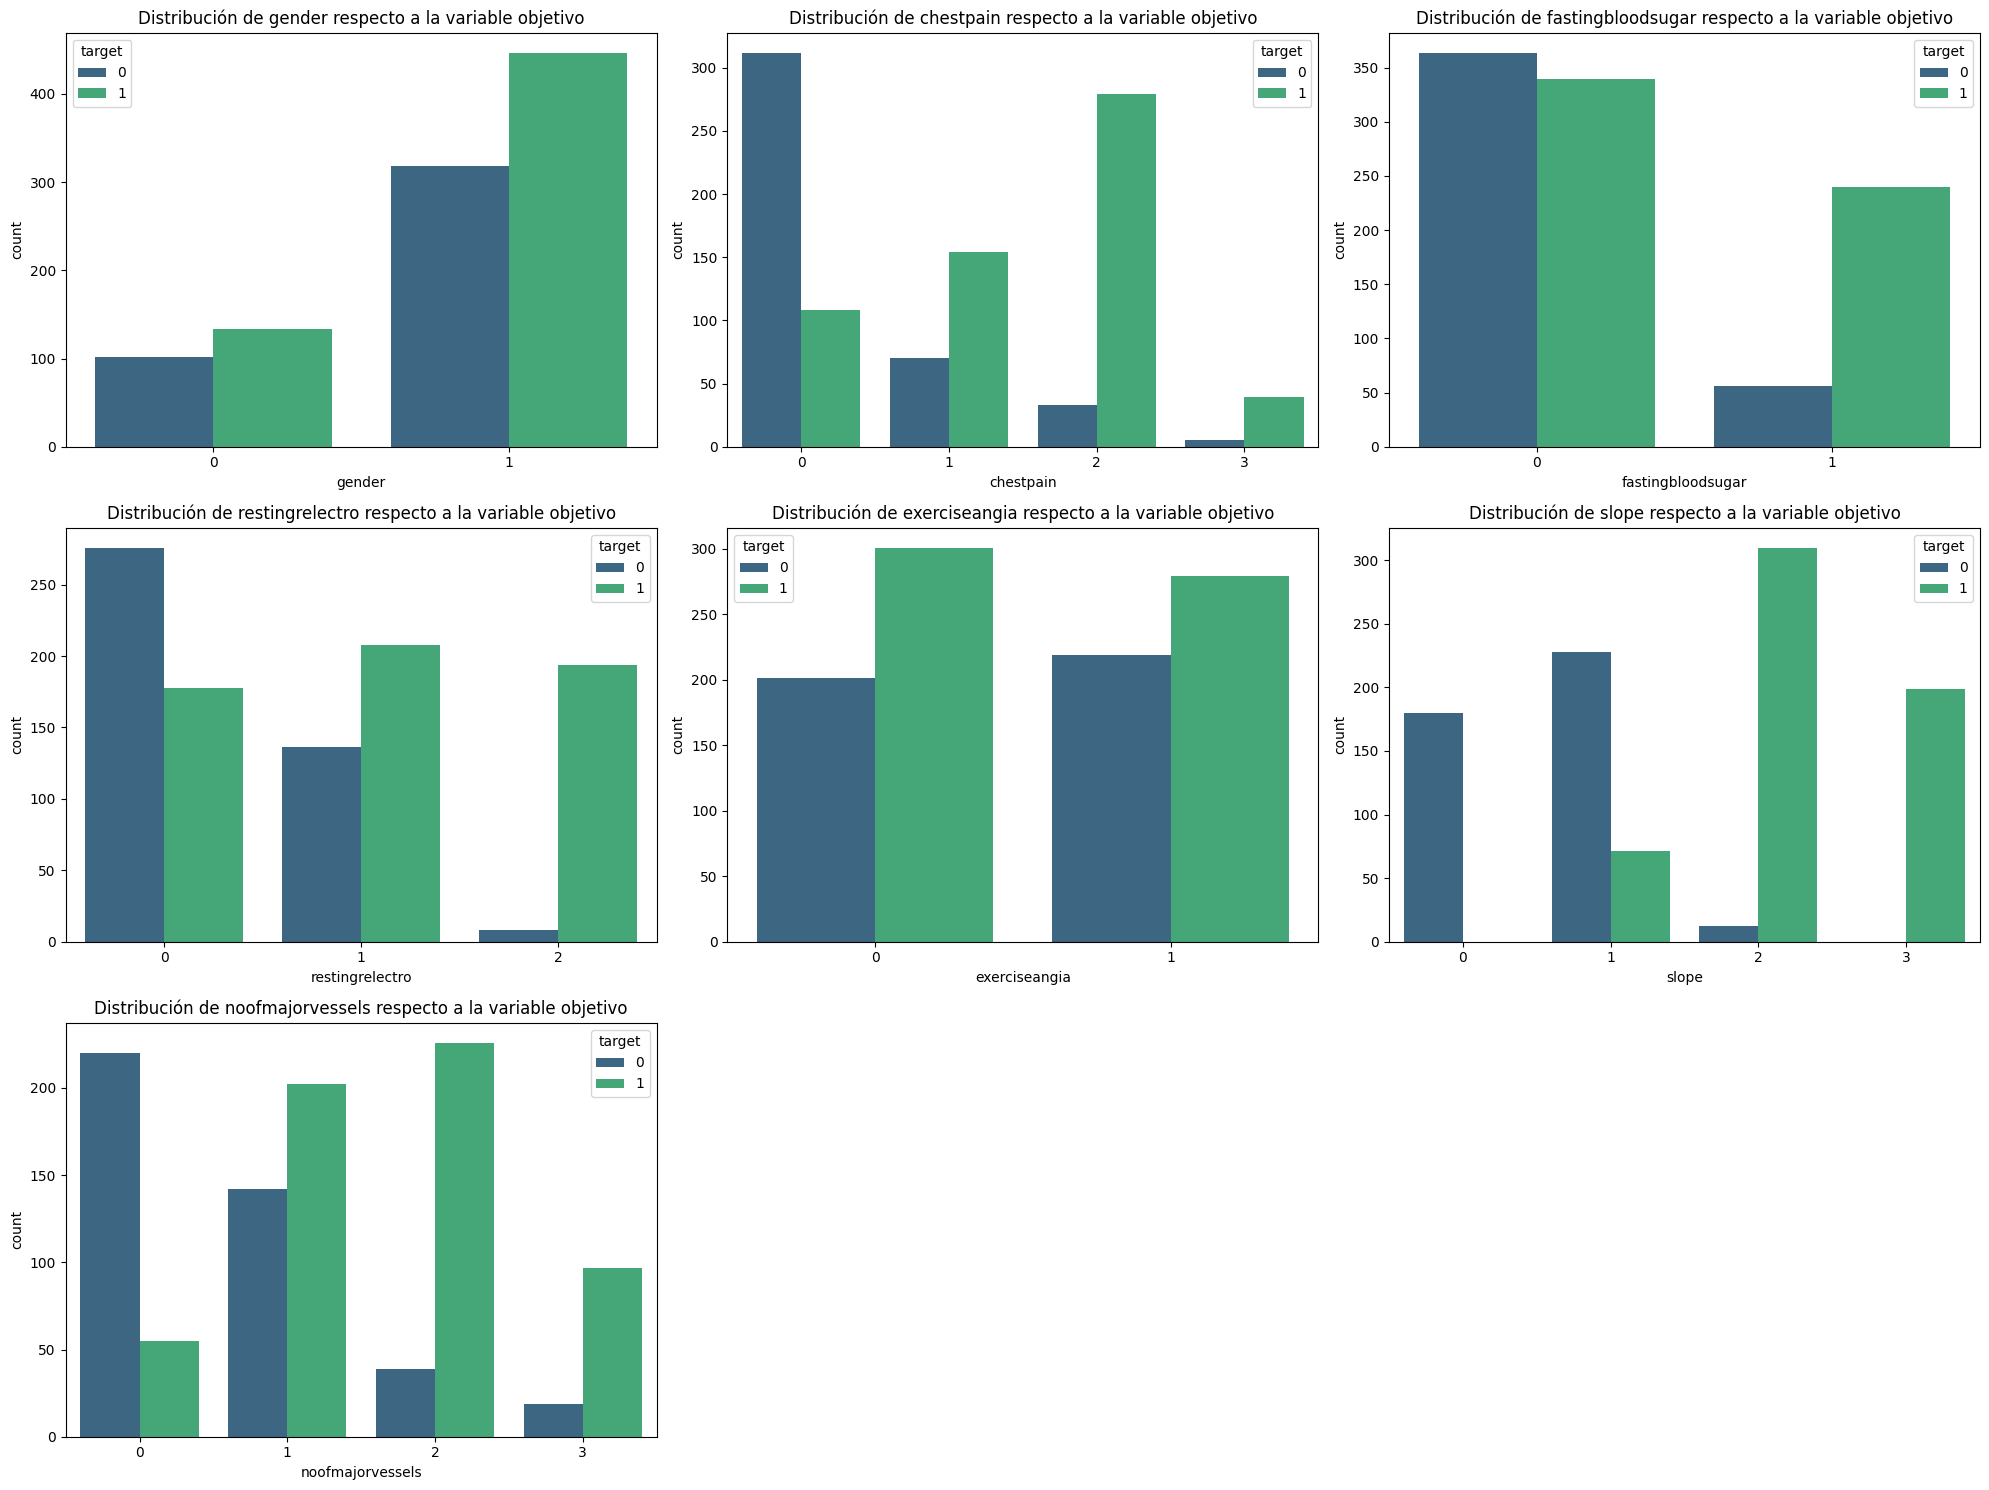

In [14]:
# Distribución de variables categóricas respecto a la variable objetivo
categorical_features = ['gender', 'chestpain', 'fastingbloodsugar', 'restingrelectro', 'exerciseangia', 'slope', 'noofmajorvessels']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df_cardiovascular_clean, x=feature, hue='target', palette='viridis')
    plt.title(f'Distribución de {feature} respecto a la variable objetivo')
plt.tight_layout()
plt.show()

## 2. Selección y Aplicación del Algoritmo de Clustering


### 2.1. Preprocesamiento de Datos

In [15]:
from sklearn.preprocessing import StandardScaler

# Preprocesamiento de datos
df_cardiovascular.dropna(inplace=True)

# Normalizar características numéricas
features_to_normalize = [
    'age', 'restingBP', 'serumcholestrol', 'maxheartrate', 
    'oldpeak', 'noofmajorvessels'
]

scaler = StandardScaler()
df_cardiovascular_clean[features_to_normalize] = scaler.fit_transform(df_cardiovascular[features_to_normalize])

# Separar las características y la etiqueta
X = df_cardiovascular.drop(columns=['target'])
y = df_cardiovascular['target']

### 2.2. Aplicación de K-Means

#### 2.2.1. Método del Codo
Calculamos el WCSS (Within-Cluster Sum of Squares) para diferentes números de clústeres y visualizamos el método del codo para identificar el número óptimo de clústeres.

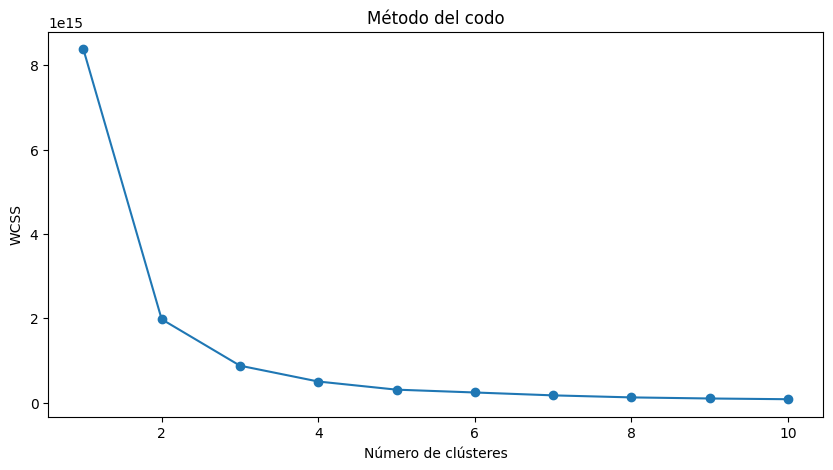

In [16]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Método del codo para K-Means
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clústeres')
plt.ylabel('WCSS')
plt.show()

Parece que el número óptimo de clusteres es 2.

#### 2.2.2. Aplicamos K-Means

Aplicamos K-Means con el número óptimo de clústeres visualizado en el método del codo.

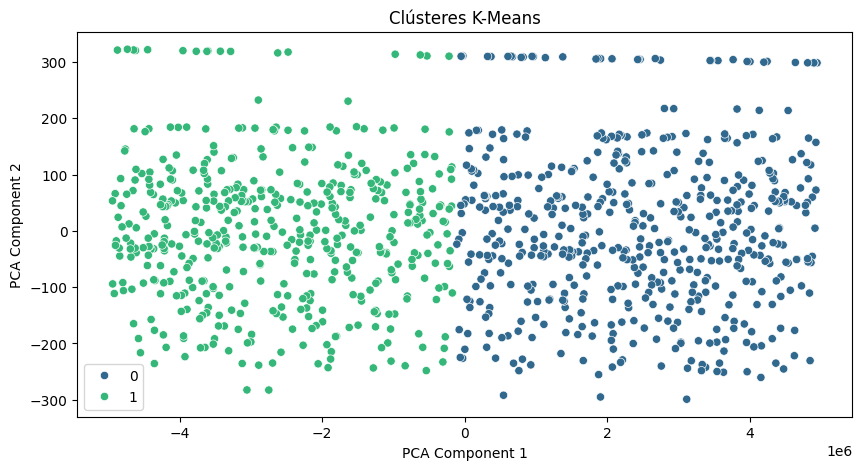

In [17]:
# Aplicar K-Means con el número óptimo de clústeres
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Reducir la dimensionalidad usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualización de los clústeres K-Means
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('Clústeres K-Means')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## 3. Evaluación de K-Means

K-Means - Silhouette Score: 0.640123325985714
K-Means - Calinski-Harabasz Index: 3232.972820153106
K-Means - Davies-Bouldin Index: 0.4784401641540077


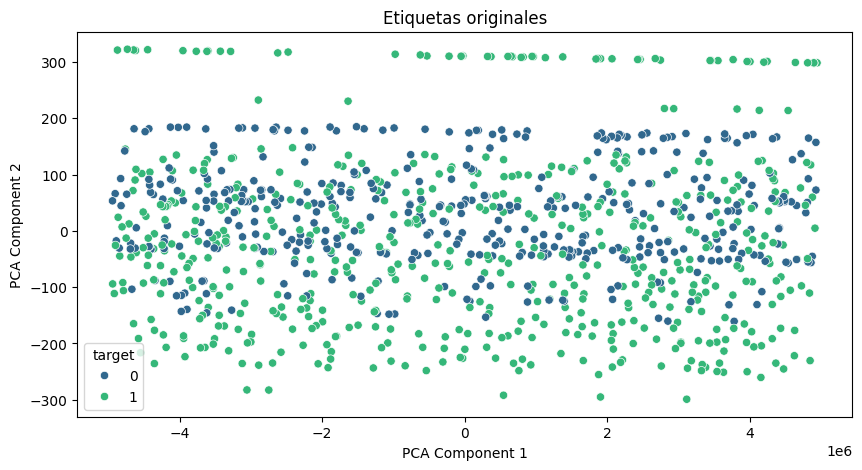

In [18]:
# Evaluación de los clústeres K-Means
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_kmeans = silhouette_score(X, kmeans_labels)
calinski_kmeans = calinski_harabasz_score(X, kmeans_labels)
davies_kmeans = davies_bouldin_score(X, kmeans_labels)

print(f"K-Means - Silhouette Score: {silhouette_kmeans}")
print(f"K-Means - Calinski-Harabasz Index: {calinski_kmeans}")
print(f"K-Means - Davies-Bouldin Index: {davies_kmeans}")

plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title('Etiquetas originales')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### Evaluación y Respuesta del Proyecto

Con los resultados obtenidos para los clústeres utilizando K-Means, vamos a interpretar los valores de las métricas y responder a la pregunta del proyecto sobre la calidad de la etiquetación original y la necesidad de posibles re-etiquetaciones.

#### Resultados Obtenidos:
- **K-Means - Silhouette Score: 0.640123325985714**
- **K-Means - Calinski-Harabasz Index: 3232.972820153106**
- **K-Means - Davies-Bouldin Index: 0.4784401641540077**

#### Interpretación de los Resultados:
1. **Silhouette Score**:
   - Rango: -1 a 1
   - Un valor cercano a 1 indica que los puntos están bien agrupados.
   - Un valor cercano a 0 indica que los puntos están en el borde de dos clústeres.
   - Un valor negativo indica que los puntos pueden estar mal agrupados.
   - **Interpretación**: Un Silhouette Score de 0.64 sugiere que los clústeres formados por K-Means son bastante consistentes, aunque no perfectos. Este valor sugiere una buena separación entre los clústeres.

2. **Calinski-Harabasz Index**:
   - No tiene un rango fijo; valores más altos indican una mejor definición de clústeres.
   - **Interpretación**: Un Calinski-Harabasz Index de 3232.97 es bastante alto, lo que sugiere que los clústeres están bien definidos y separados.

3. **Davies-Bouldin Index**:
   - Rango: 0 a ∞ (valores más bajos indican mejores clústeres)
   - **Interpretación**: Un Davies-Bouldin Index de 0.478 es bastante bajo, indicando que los clústeres son compactos y bien separados.

## Conclusión:
Los resultados indican que los clústeres formados por el algoritmo K-Means son bastante buenos. La buena separación y definición de los clústeres sugiere que hay una estructura clara en los datos que el modelo de K-Means ha podido capturar efectivamente.

### Respuesta a la Pregunta del Proyecto:
**¿Es necesaria una re-etiquetación de los datos?**

Dado que los clústeres formados por K-Means muestran una buena calidad según las métricas de evaluación, se sugiere que existe una estructura subyacente en los datos que puede no estar completamente alineada con las etiquetas originales. Estos resultados pueden indicar que:

- Las etiquetas originales pueden no reflejar completamente la verdadera estructura de los datos.
- Podría haber subgrupos dentro de las categorías existentes que no fueron previamente considerados.

**Recomendaciones**:
1. **Revisión de Etiquetas**: Considerar una revisión exhaustiva de las etiquetas originales para verificar su exactitud.
2. **Análisis Adicional**: Realizar análisis adicionales con otros métodos de clustering y compararlos.
3. **Validación Clínica**: Consultar con expertos médicos para validar si los clústeres descubiertos tienen sentido clínico y corresponden a subgrupos clínicamente relevantes.

Si los clústeres encontrados tienen relevancia clínica, podría ser necesario actualizar las etiquetas del dataset para reflejar mejor la estructura descubierta por el análisis de clustering.